In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import os
from sklearn.svm import SVC
from yellowbrick.model_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50)

#check to see the correct table was imported
df.head()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6516,0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,0.564000
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,0.581667
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.860000
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,11391,0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,0.816000


In [4]:
%pwd #find where we are

'/Users/lisaschreiber/Desktop'

In [5]:
#set data to just 2013
df = df.loc[(df.year == 0)]

In [6]:
#list columns to select the ones needed to set the variables
list(df)

['index',
 'Scotland',
 'East Anglian Region',
 'London Region',
 'South Region',
 'North Western Region',
 'West Midlands Region',
 'South West Region',
 'East Midlands Region',
 'South East Region',
 'Wales',
 'Yorkshire Region',
 'North Region',
 'Ireland',
 'id_student',
 'code_module',
 'module_domain',
 'module_presentation_length',
 'term',
 'year',
 'num_of_prev_attempts',
 'final_result',
 'date_registration',
 'disability',
 'gender',
 'age_band',
 'region',
 'highest_education',
 'imd_band',
 'studied_credits',
 'b4_sum_clicks',
 'qtr_sum_clicks',
 'half_sum_clicks',
 'threeqtr_sum_clicks',
 'qtr_half_sum_clicks',
 'half_threeqtr_sum_clicks',
 'thrd_sum_clicks',
 'twothrd_sum_clicks',
 'thrd_twothrd_sum_clicks',
 'allclicks',
 'std_half_score']

In [7]:
#set variables for module
X = df[['code_module',
 'module_domain',
 'module_presentation_length',
 'term',
 'year',
 'num_of_prev_attempts',
 'date_registration',
 'disability',
 'gender',
 'age_band',
 'region',
 'highest_education',
 'imd_band',
 'studied_credits',
 'b4_sum_clicks',
 'half_sum_clicks',
 'std_half_score']]

y = df['final_result']

# RFECV Visualizer with a Linear SVM classifier

In [8]:
# Instantiate RFECV visualizer with a linear SVM classifier
# visualizer = RFECV(SVC(kernel='linear', C=1))

# visualizer.fit(X, y)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

# Stratified Folds

5 Stratified Folds

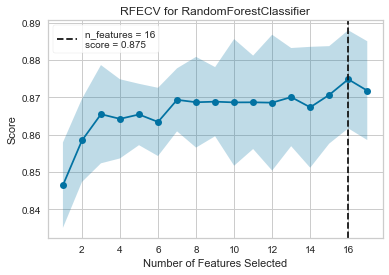

In [9]:
cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

12 Stratified folds

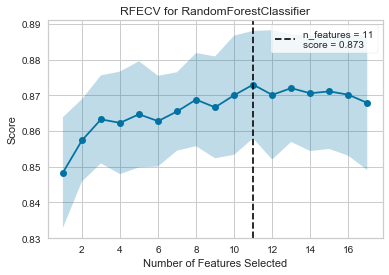

In [10]:
cv = StratifiedKFold(12)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure